## Challenge Title : Data for Social Good - Hackathon
## Project ID : SPS_PRO_2718
## Project Title : SDG 2 Zero Hunger

## Project Description

The agricultural crops corn, groundnut, and bengal gram are vital in the agricultural landscape for the state of Telangana.
In this challenge we provided a visualization and policy recommendations.

Precision Farming for improving yield background: Farming is a multistage process in which majorly there are 3 growth stages. Across these stages, farmers use, depending on the natural state of climate variables, resources such as water, seeds, fertilizers, pesticides, and insecticides. The farm output is yield which is dependent on these underlying variables. Using these variables, predicting the historical yield through an ML model could give us statistical relationships between variables that affect the yield of a particular crop.

Selected Crops:
• Maize
• Groundnut
• Bengal Gram
Objectives:
1) Identify variable(s) in accordance with their relevant influence on crop yield
2) Recommend best practices to maximize the yield for a particular crop
3) Build a Machine-Learning model to predict yield.
4) Provide insights & policy recommendations based on the overall findings

### Importing data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
df = pd.read_excel(r"C:\Users\balus\Downloads\1_yield_data (2).xlsx")
df

,S.No,Crop,Dist_id,District,Year,Season,Season_yield,Total
0,1,groundnut,1,ADILABAD,2016-2017,kharif,0,2068
1,2,groundnut,11,KOMARAM BHEEM,2016-2017,kharif,0,2068
2,4,groundnut,13,MANCHERIAL,2016-2017,kharif,1930,2066
3,5,groundnut,21,NIRMAL,2016-2017,kharif,0,2068
4,6,groundnut,22,NIZAMABAD,2016-2017,kharif,1930,2044
...,...,...,...,...,...,...,...,...
553,555,bengal gram,30,WANAPARTHY,2018-2019,rabi,2140,2140
554,556,bengal gram,18,NAGARKURNOOL,2018-2019,rabi,1569,1569
555,557,bengal gram,19,NALGONDA,2018-2019,rabi,1569,1569
556,558,bengal gram,28,SURYAPET,2018-2019,rabi,1569,1569


### Visualization of data

### Groundnut

In [66]:
df1 = pd.read_excel(r"C:\Users\balus\Downloads\1_yield_data (2).xlsx")

            Total
Year             
2016-2017  116556
2017-2018  121468
2018-2019  136758
Bar plot of the above data
Line plot of the above data


<AxesSubplot:xlabel='Year'>

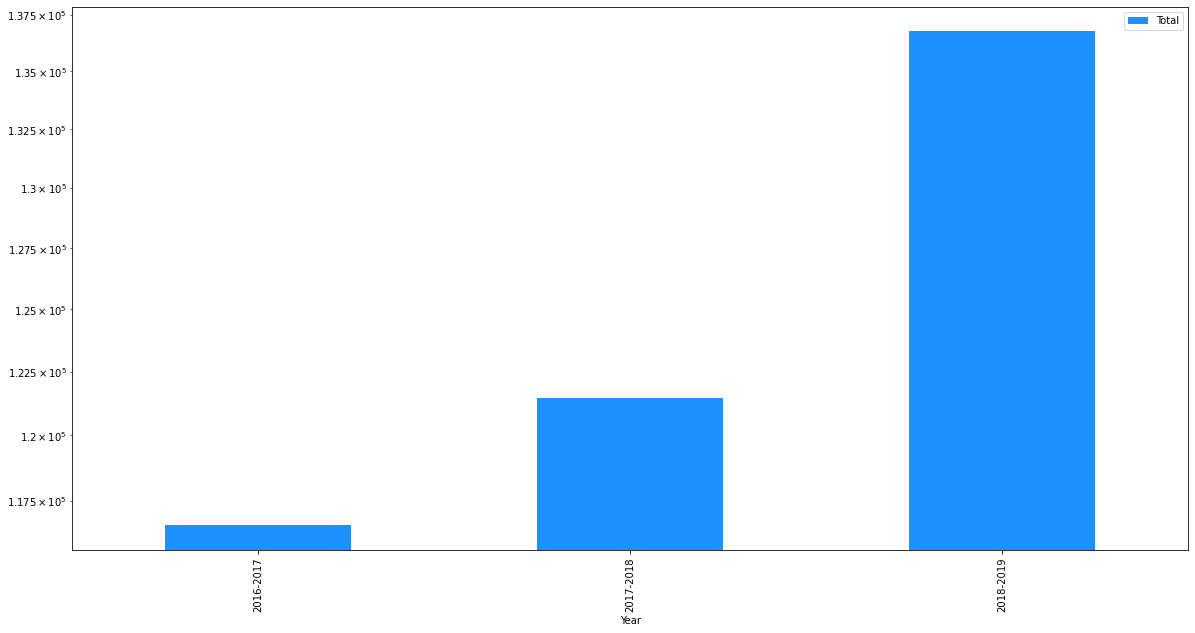

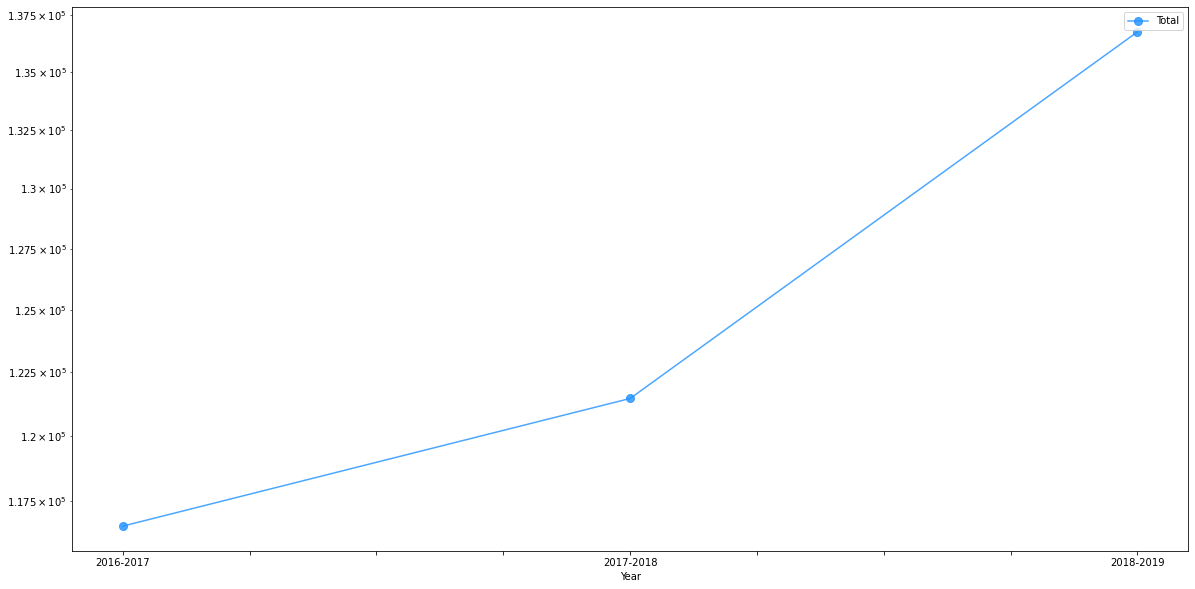

In [71]:
cultivation_data = df1[['Year', 'Crop', 'District', 'Total']]
y='groundnut'
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Year')[['Total', 'District']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

### Maize

            Total
Year             
2016-2017  257316
2017-2018  302826
2018-2019  269066
Bar plot of the above data
Line plot of the above data


<AxesSubplot:xlabel='Year'>

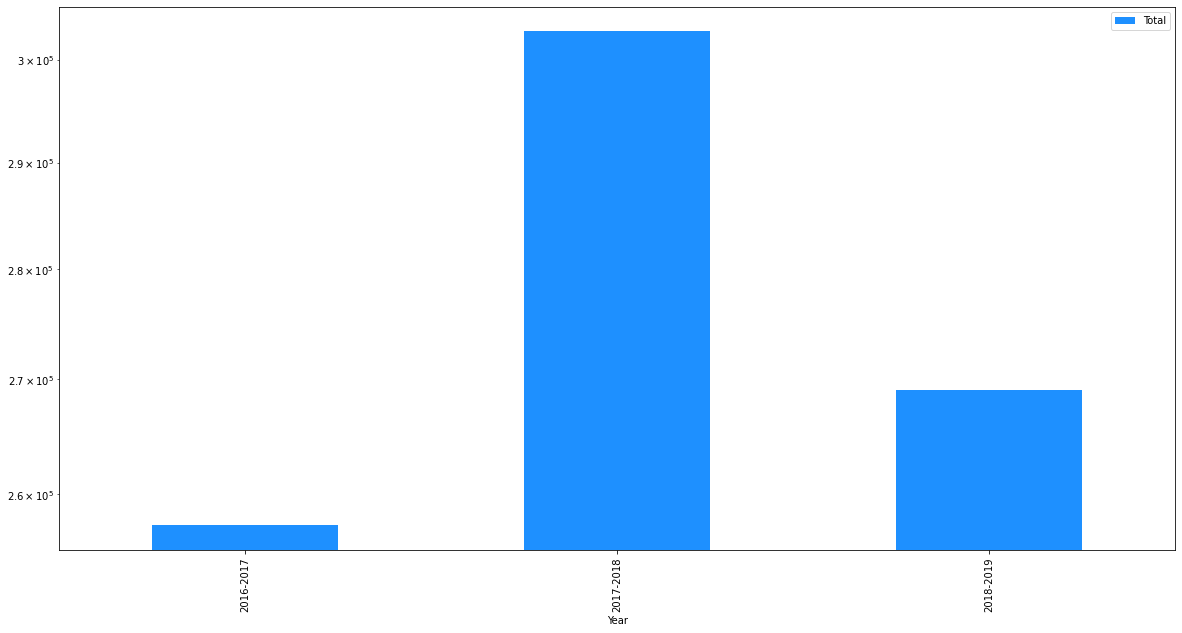

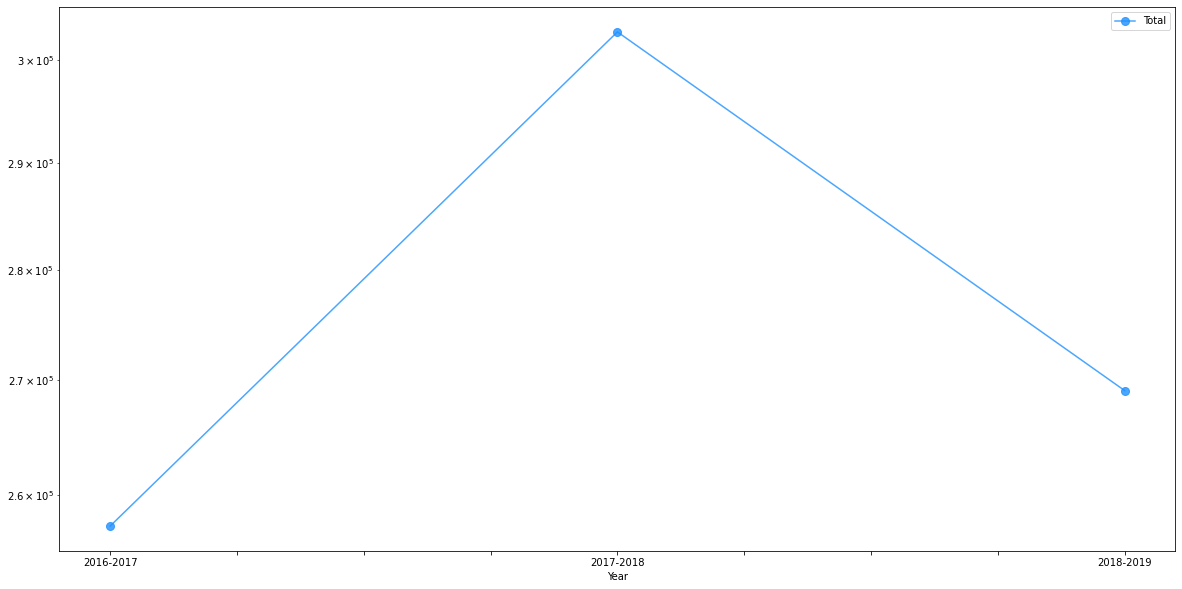

In [73]:
cultivation_data = df1[['Year', 'Crop', 'District', 'Total']]
y='maize'
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Year')[['Total', 'District']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

### Bengal gram

           Total
Year            
2016-2017  76998
2017-2018  90026
2018-2019  88078
Bar plot of the above data
Line plot of the above data


<AxesSubplot:xlabel='Year'>

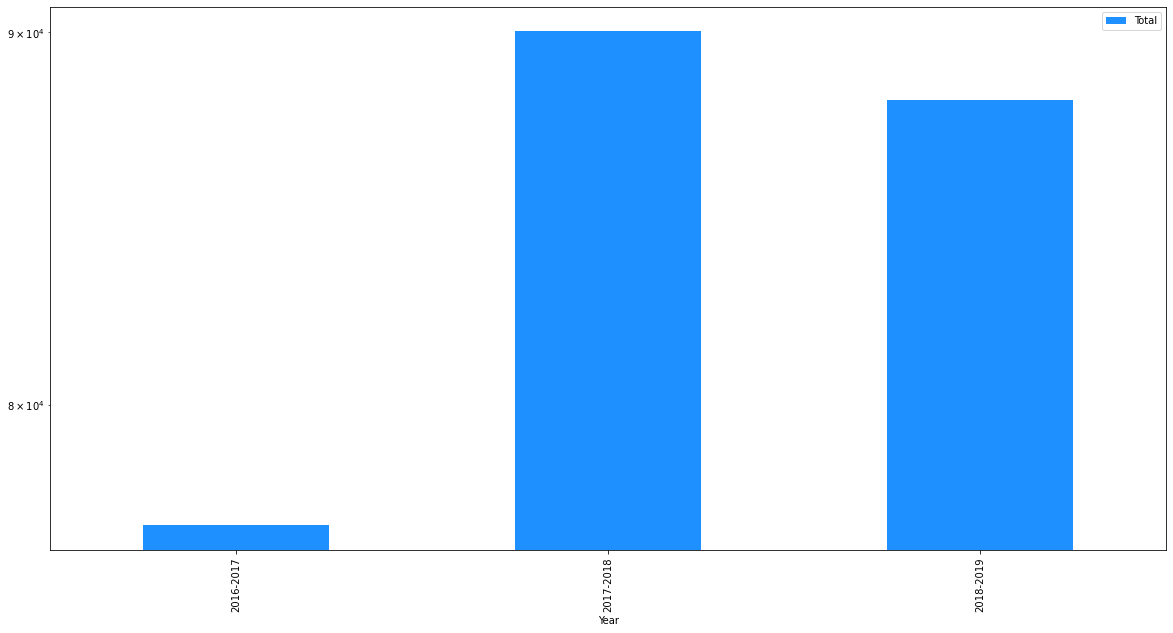

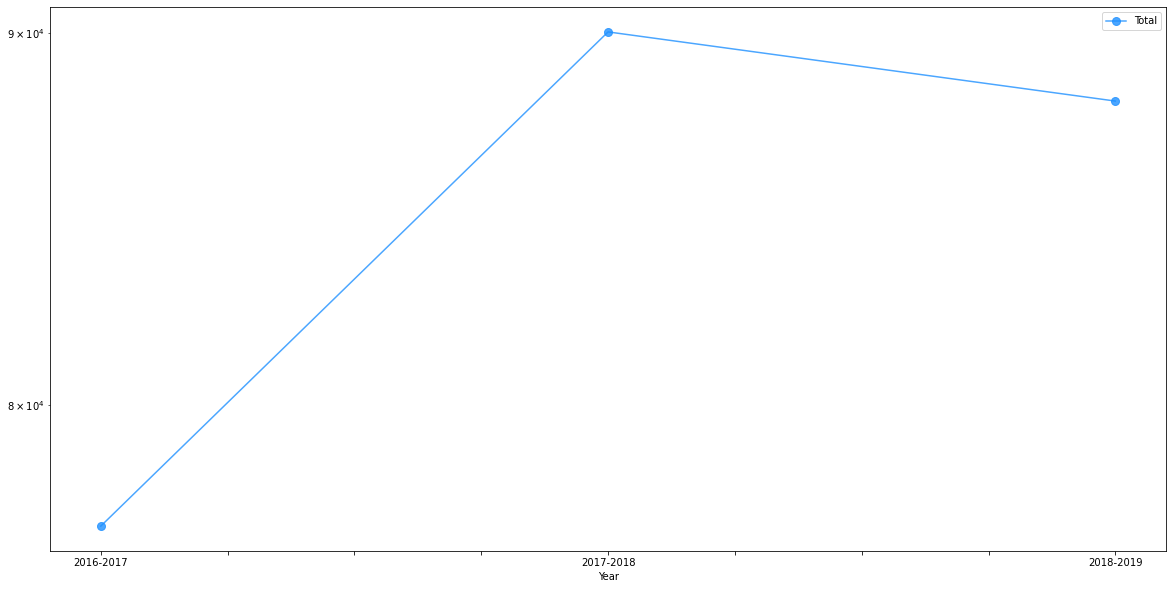

In [72]:
cultivation_data = df1[['Year', 'Crop', 'District', 'Total']]
y='bengal gram'
cultivation_data=cultivation_data.groupby('Crop').get_group(y)
cultivation_data=cultivation_data.groupby('Year')[['Total', 'District']].sum()
    
print(cultivation_data)
print("Bar plot of the above data")
cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
print("Line plot of the above data")
cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

In [24]:
df[['Dist_id','District']].head(20)

,Dist_id,District
0,1,ADILABAD
1,11,KOMARAM BHEEM
2,13,MANCHERIAL
3,21,NIRMAL
4,22,NIZAMABAD
5,4,JAGTIAL
6,23,PEDDAPALLI
7,6,JAYASHANKAR
8,2,BHADRADRI
9,16,MAHABUBABAD


In [38]:
df.drop('Dist_id',axis=1,inplace=True)
df.drop('S.No',axis=1,inplace=True)
df

,Crop,District,Year,Season,Season_yield,Total
0,groundnut,ADILABAD,2016-2017,kharif,0,2068
1,groundnut,KOMARAM BHEEM,2016-2017,kharif,0,2068
2,groundnut,MANCHERIAL,2016-2017,kharif,1930,2066
3,groundnut,NIRMAL,2016-2017,kharif,0,2068
4,groundnut,NIZAMABAD,2016-2017,kharif,1930,2044
...,...,...,...,...,...,...
553,bengal gram,WANAPARTHY,2018-2019,rabi,2140,2140
554,bengal gram,NAGARKURNOOL,2018-2019,rabi,1569,1569
555,bengal gram,NALGONDA,2018-2019,rabi,1569,1569
556,bengal gram,SURYAPET,2018-2019,rabi,1569,1569


In [28]:
df['Year'].describe()

count           558
unique            3
top       2018-2019
freq            186
Name: Year, dtype: object

In [39]:
df.drop('Season_yield',axis=1,inplace=True)
df

,Crop,District,Year,Season,Total
0,groundnut,ADILABAD,2016-2017,kharif,2068
1,groundnut,KOMARAM BHEEM,2016-2017,kharif,2068
2,groundnut,MANCHERIAL,2016-2017,kharif,2066
3,groundnut,NIRMAL,2016-2017,kharif,2068
4,groundnut,NIZAMABAD,2016-2017,kharif,2044
...,...,...,...,...,...
553,bengal gram,WANAPARTHY,2018-2019,rabi,2140
554,bengal gram,NAGARKURNOOL,2018-2019,rabi,1569
555,bengal gram,NALGONDA,2018-2019,rabi,1569
556,bengal gram,SURYAPET,2018-2019,rabi,1569


In [33]:
df.isna().sum()

Crop        0
District    0
Year        0
Season      0
Total       0
dtype: int64

### Data preprocessing

In [40]:
var1= pd.get_dummies(df['Season'])
df=pd.concat([df,var1],axis=1)
df.drop('Season',axis=1,inplace=True)
df.head()

,Crop,District,Year,Total,kharif,rabi
0,groundnut,ADILABAD,2016-2017,2068,1,0
1,groundnut,KOMARAM BHEEM,2016-2017,2068,1,0
2,groundnut,MANCHERIAL,2016-2017,2066,1,0
3,groundnut,NIRMAL,2016-2017,2068,1,0
4,groundnut,NIZAMABAD,2016-2017,2044,1,0


In [41]:
var2= pd.get_dummies(df['Crop'])
df=pd.concat([df,var2],axis=1)
df.drop('Crop',axis=1,inplace=True)
df.head()

,District,Year,Total,kharif,rabi,bengal gram,groundnut,maize
0,ADILABAD,2016-2017,2068,1,0,0,1,0
1,KOMARAM BHEEM,2016-2017,2068,1,0,0,1,0
2,MANCHERIAL,2016-2017,2066,1,0,0,1,0
3,NIRMAL,2016-2017,2068,1,0,0,1,0
4,NIZAMABAD,2016-2017,2044,1,0,0,1,0


In [42]:
var3= pd.get_dummies(df['District'])
df=pd.concat([df,var3],axis=1)
df.drop('District',axis=1,inplace=True)
df.head()

,Year,Total,kharif,rabi,bengal gram,groundnut,maize,ADILABAD,BHADRADRI,HYDERABAD,...,RAJANNA,RANGAREDDY,SANGAREDDY,SIDDIPET,SURYAPET,VIKARABAD,WANAPARTHY,WARANGAL RURAL,WARANGAL URBAN,YADADRI
0,2016-2017,2068,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-2017,2068,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-2017,2066,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-2017,2068,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-2017,2044,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
var4= pd.get_dummies(df['Year'])
df=pd.concat([df,var4],axis=1)
df.drop('Year',axis=1,inplace=True)
df.head()

,Total,kharif,rabi,bengal gram,groundnut,maize,ADILABAD,BHADRADRI,HYDERABAD,JAGTIAL,...,SIDDIPET,SURYAPET,VIKARABAD,WANAPARTHY,WARANGAL RURAL,WARANGAL URBAN,YADADRI,2016-2017,2017-2018,2018-2019
0,2068,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2068,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2066,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2068,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2044,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
X = df.loc[:,df.columns!='Total']
X

,kharif,rabi,bengal gram,groundnut,maize,ADILABAD,BHADRADRI,HYDERABAD,JAGTIAL,JANGAON,...,SIDDIPET,SURYAPET,VIKARABAD,WANAPARTHY,WARANGAL RURAL,WARANGAL URBAN,YADADRI,2016-2017,2017-2018,2018-2019
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
554,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
555,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
556,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [56]:
y = df['Total']
y

0      2068
1      2068
2      2066
3      2068
4      2044
       ... 
553    2140
554    1569
555    1569
556    1569
557    1569
Name: Total, Length: 558, dtype: int64

### Train and Test splitting
### Model development

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [57]:
from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [58]:
rfc = RandomForestRegressor(random_state=0,n_jobs=-1)

In [59]:
rfc.fit(train_inputs,train_targets)

RandomForestRegressor(n_jobs=-1, random_state=0)

### Evaulation

In [60]:
rfc.score(train_inputs,train_targets)

0.9918579051433933

In [61]:
rfc.score(val_inputs,val_targets)

0.9484989233518026

# CONCLUSION : The RandomForestRegressor is 94% accurate.

The outcome of crop yield primarily depends on parameters such as variety of crop, seed type and environmental parameters. By analyzing these at particular region best crop in order to have more crop yield and the net crop yield can be predicted. This prediction will help the farmers. To choose appropriate crops for their farm according to the requirement.